In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [88]:
vaccine_df = pd.read_csv("data/covid-19-post-vaccination-statewide-stats.csv")
vaccine_df.head()

         date        area area_type  unvaccinated_cases  vaccinated_cases  \
0  2021-02-01  California     State               13861                24   
1  2021-02-02  California     State               11380                18   
2  2021-02-03  California     State               10358                27   
3  2021-02-04  California     State                9027                17   
4  2021-02-06  California     State                5982                13   

   boosted_cases  unvaccinated_hosp  vaccinated_hosp  boosted_hosp  \
0              0                764                0             0   
1              0                592                0             0   
2              0                546                0             0   
3              0                483                0             0   
4              0                374                1             0   

   unvaccinated_deaths  ...  population_boosted  unvaccinated_cases_per_100k  \
0                   12  ...         

In [82]:
# Data Wrangling


# Make data column to date type.
vaccine_df['date'] = pd.to_datetime(vaccine_df['date'])
# Sort the dataframe by date.
vaccine_df.index = vaccine_df['date']
vaccine_df = vaccine_df.sort_index()
vaccine_df.head()


                 date        area area_type  unvaccinated_cases  \
date                                                              
2021-02-01 2021-02-01  California     State               13861   
2021-02-02 2021-02-02  California     State               11380   
2021-02-03 2021-02-03  California     State               10358   
2021-02-04 2021-02-04  California     State                9027   
2021-02-05 2021-02-05  California     State                8426   

            vaccinated_cases  boosted_cases  unvaccinated_hosp  \
date                                                             
2021-02-01                24              0                764   
2021-02-02                18              0                592   
2021-02-03                27              0                546   
2021-02-04                17              0                483   
2021-02-05                17              0                497   

            vaccinated_hosp  boosted_hosp  unvaccinated_deaths  ...

In [83]:
# Style settings of the plot.

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Pink, CB91_Green,
              CB91_Amber, CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

pd.options.display.notebook_repr_html = False  
plt.rcParams['figure.dpi'] = 100


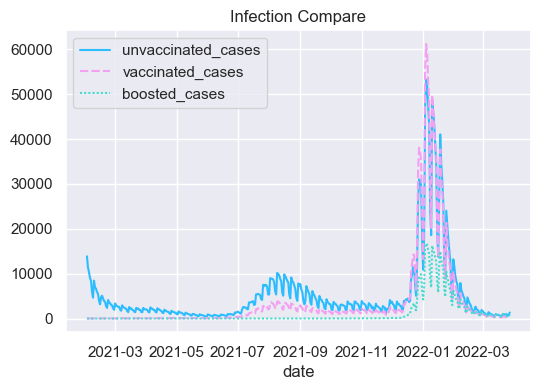

In [84]:
# Infaction cases comparasion.
sns.lineplot(data=[vaccine_df['unvaccinated_cases'],
             vaccine_df['vaccinated_cases'],
             vaccine_df['boosted_cases']]).set(title="Infection Compare")

plt.show()

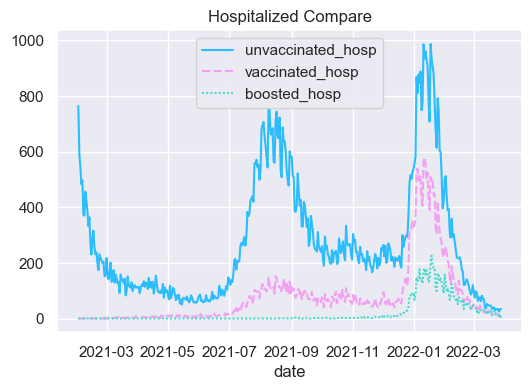

In [85]:
# Hospitalized cases comparasion.
sns.lineplot(data=[vaccine_df['unvaccinated_hosp'],
             vaccine_df['vaccinated_hosp'],
             vaccine_df['boosted_hosp']]).set(title="Hospitalized Compare")
plt.show()


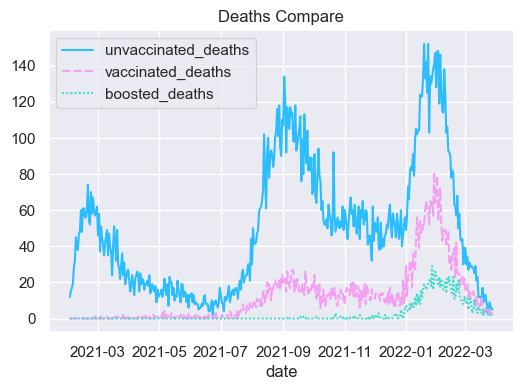

In [86]:
# Death cases comparasion.
sns.lineplot(data=[vaccine_df['unvaccinated_deaths'],
             vaccine_df['vaccinated_deaths'],
             vaccine_df['boosted_deaths']]).set(title="Deaths Compare")
plt.show()


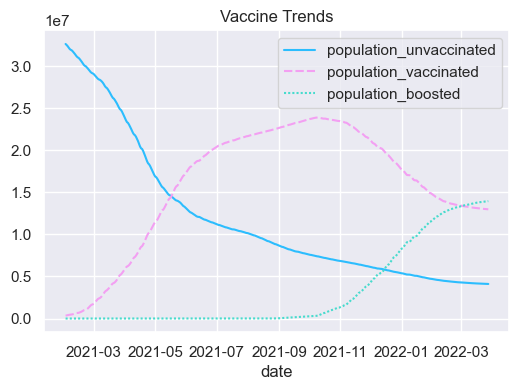

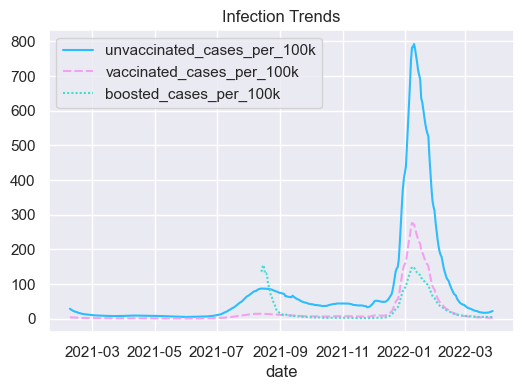

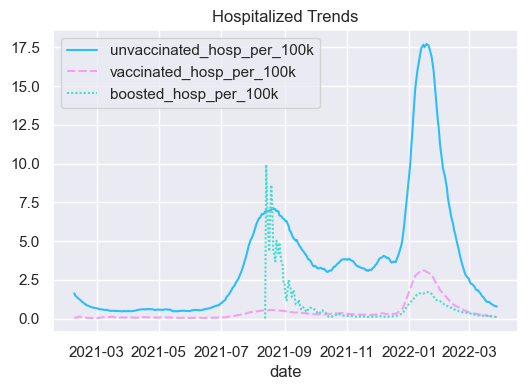

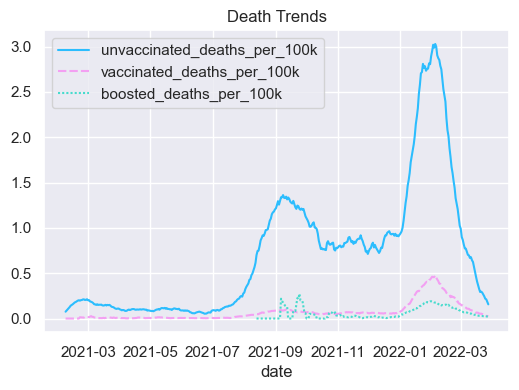

In [87]:
# The vaccined trends.
sns.lineplot(data=[vaccine_df['population_unvaccinated'],
             vaccine_df['population_vaccinated'],
             vaccine_df['population_boosted']]).set(title="Vaccine Trends")
plt.show()

# The infection trends
sns.lineplot(data=[vaccine_df['unvaccinated_cases_per_100k'],
             vaccine_df['vaccinated_cases_per_100k'],
             vaccine_df['boosted_cases_per_100k']]).set(title="Infection Trends")
plt.show()

# The hospitalized trends.
sns.lineplot(data=[vaccine_df['unvaccinated_hosp_per_100k'],
             vaccine_df['vaccinated_hosp_per_100k'],
             vaccine_df['boosted_hosp_per_100k']]).set(title="Hospitalized Trends")
plt.show()

# The death trends.
sns.lineplot(data=[vaccine_df['unvaccinated_deaths_per_100k'],
             vaccine_df['vaccinated_deaths_per_100k'],
             vaccine_df['boosted_deaths_per_100k']]).set(title="Death Trends")
plt.show()


Text(0, 0.5, 'Diabetes')

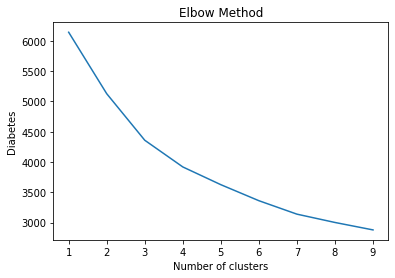

In [6]:
# Elbow plot
wcss = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(scaled_features)
    wcss.append(model.inertia_)
plt.plot(K,wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Diabetes')

In [7]:
# K-means clustering
kmeans = KMeans (n_clusters=2)
kmeans.fit(scaled_features)
# centroid - cluster center
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

[[-0.52168059 -0.23243325 -0.22241695  0.08273601  0.02065866 -0.06450554
  -0.01499991 -0.57390851]
 [ 0.96221087  0.42871022  0.41023571 -0.15260198 -0.03810374  0.11897688
   0.02766651  1.05854237]]
[1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 

Text(0.5, 1.0, 'Real Outcome')

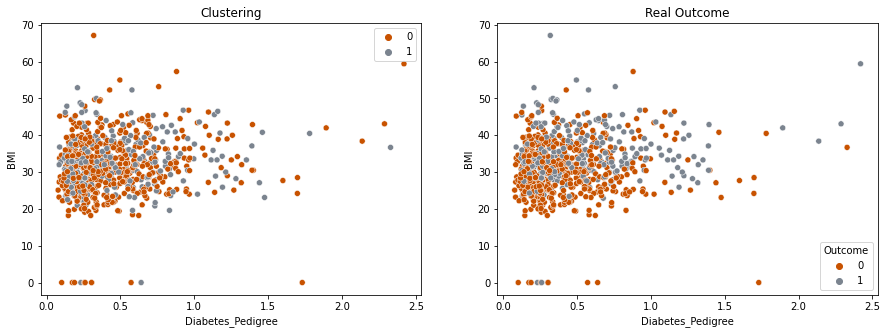

In [11]:
# Scatter Plot

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Create a scatter plot of two features and color it according to the results from the clustering.
color_dict = dict({0:'#C85200',
                   1:'#7B848F'})
sns.scatterplot(ax=axes[0], x=patients_df['Diabetes_Pedigree'],y=patients_df['BMI'], 
                hue=labels, palette=color_dict)
axes[0].set_title('Clustering')

# Create a scatter plot of two features and color it according to the real diagnosis (B or M).
color_dict = dict({0:'#C85200',
                    1:'#7B848F'})
sns.scatterplot(ax=axes[1], x=patients_df['Diabetes_Pedigree'],y=patients_df['BMI'], 
                hue=patients_df['Outcome'], palette=color_dict)
axes[1].set_title('Real Outcome')